In [1]:
import numpy as np

class Perceptron(object):

    def __init__(self, no_of_inputs):
        self.weights = np.zeros(no_of_inputs + 1)

    def predict(self, inputs):
        #np.dot = produto escalar, ignorando o indice zero
        #se o valor for maior que zero retorna o valor
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = summation
        else:
            activation = 0
        return activation

Criando uma rede neural

In [2]:
import torch
from torch import nn
import numpy as np

In [3]:
class LineNetwork(nn.Module):
#classe que representa a rede neural
    #iniciar
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(1,1)
        )
    #Como a rede computa
    #Neuro é o modelo de uma função
    def forward(self, x):
        return self.layers(x)

In [ ]:
#Como Treinar uma rede neural artificial?

In [4]:
from torch.utils.data import Dataset, DataLoader
import torch.distributions.uniform as urand

In [5]:
#Classe que representa o treinamento
class AlgebraicDataset(Dataset):
  def __init__(self, f, interval, nsamples):
    X = urand.Uniform(interval[0], interval[1]).sample([nsamples])
    self.data = [(x, f(x)) for x in X]

  def __len__(self):
    return len(self.data)

  def __getitem__(self, idx):
    return self.data[idx]

In [6]:
line = lambda x: 2*x + 3
interval = (-10, 10)
train_nsamples = 1000
test_nsamples = 100

In [7]:
train_dataset = AlgebraicDataset(line, interval, train_nsamples)
test_dataset = AlgebraicDataset(line, interval, test_nsamples)

train_dataloader = DataLoader(train_dataset, batch_size=train_nsamples, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=test_nsamples, shuffle=True)

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Rodando na {device}")

Rodando na cpu


In [9]:
model = LineNetwork().to(device)

In [10]:
#Hiperparametros de otimização
#Funçao de perda(loss function)
# Erro quadratico medio(MSE = mean squared error)
# SGD = Gradiente descendente estocastico
#Taxa de aprendizad = lr(learning rate)

lossfunc = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [11]:
def train(model, dataloader, lossfunc, optimizer):
    #X = dado, y = resposta que quero predizer
    model.train()
    cumloss = 0.0

    for X, y in dataloader:
        X = X.unsqueeze(1).float().to(device)
        y = y.unsqueeze(1).float().to(device)

        pred = model(X)
        loss = lossfunc(pred, y)

        # Zera os gradientes acumulados
        optimizer.zero_grad()

        # Computa os gradientes
        loss.backward()

        # Anda, de fato, na direção que reduz o erro local
        optimizer.step()

        # loss é um tensor, item pra obter o flot
        cumloss+= loss.item()
    return cumloss/len(dataloader)


def test(model, dataloader, lossfunc):
    model.eval()
    cumloss = 0.0
    with torch.no_grad():
        for X, y in dataloader:
            X = X.unsqueeze(1).float().to(device)
            y = y.unsqueeze(1).float().to(device)

            pred = model(X)
            loss = lossfunc(pred, y)

            cumloss += loss.item()
    return cumloss/ len(dataloader)

Treinando a rede

In [13]:
import matplotlib.pyplot as plt

In [14]:
# Pra visualizar
def plot_comparinson(f, model, interval=(-10, 10), nsamples=10):
  fig, ax = plt.subplots(figsize=(10, 10))

  ax.grid(True, which='both')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['top'].set_color('none')

  samples = np.linspace(interval[0], interval[1], nsamples)
  model.eval()
  with torch.no_grad():
    pred = model(torch.tensor(samples).unsqueeze(1).float().to(device))

  ax.plot(samples, list(map(f, samples)), "o", label="ground truth")
  ax.plot(samples, pred.cpu(), label="model")
  plt.legend()
  plt.show()

Epoch: {t}; Train Loss:{train_loss}


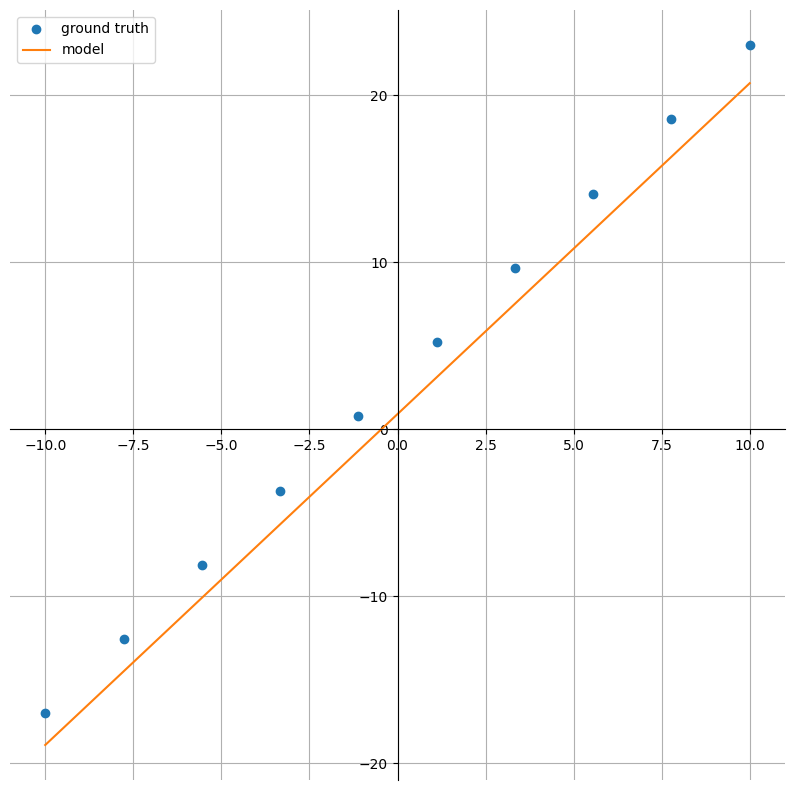

Epoch: {t}; Train Loss:{train_loss}


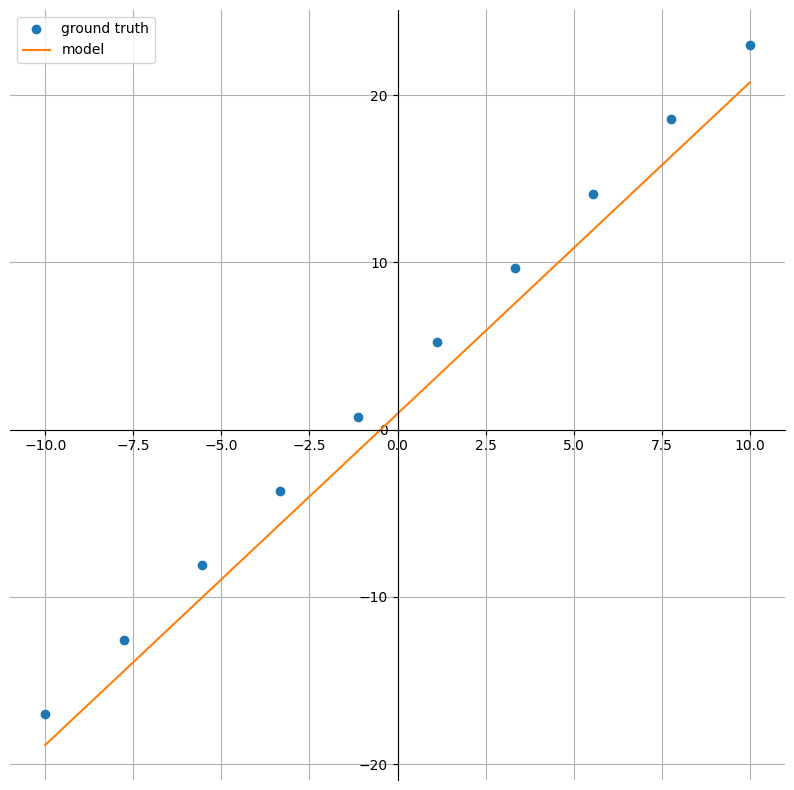

Epoch: {t}; Train Loss:{train_loss}


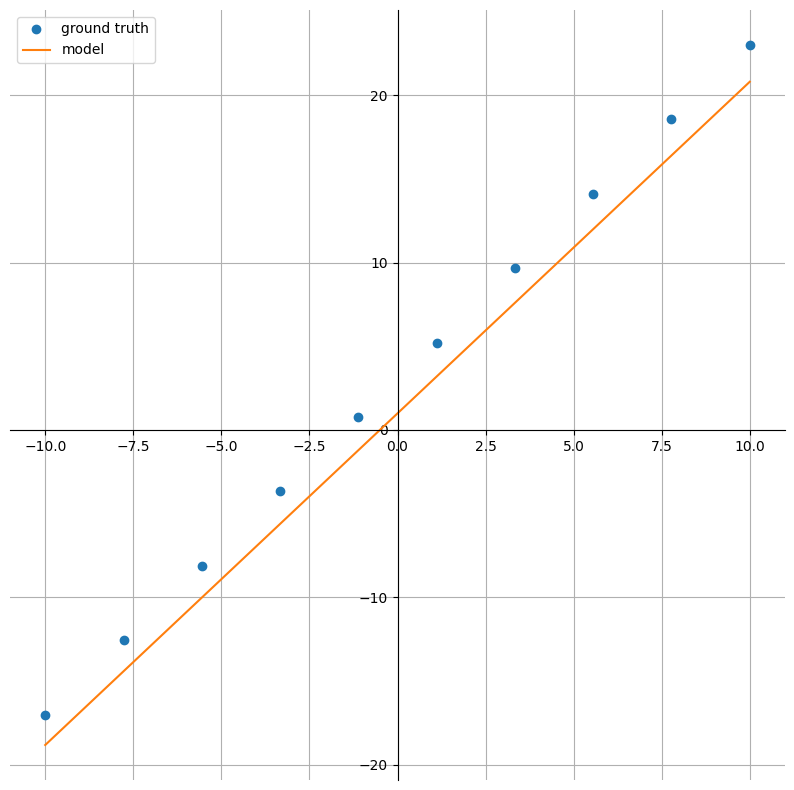

Epoch: {t}; Train Loss:{train_loss}


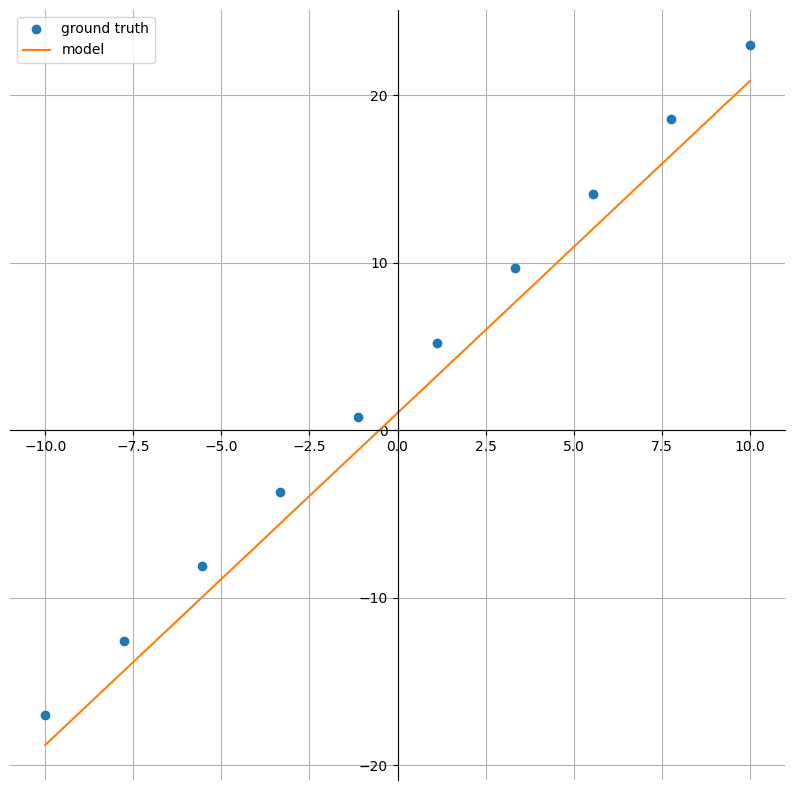

Epoch: {t}; Train Loss:{train_loss}


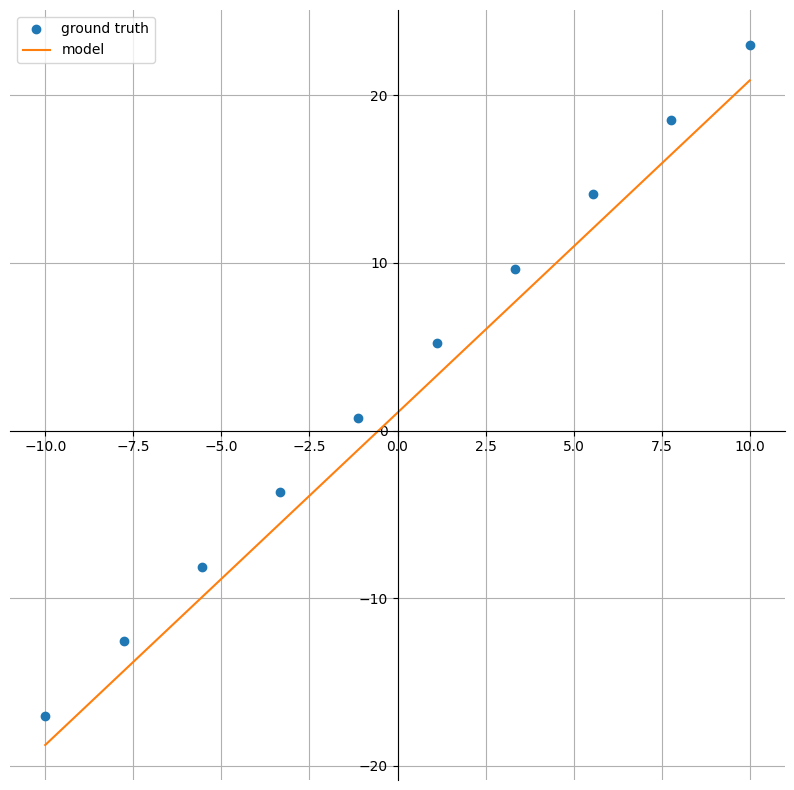

Epoch: {t}; Train Loss:{train_loss}


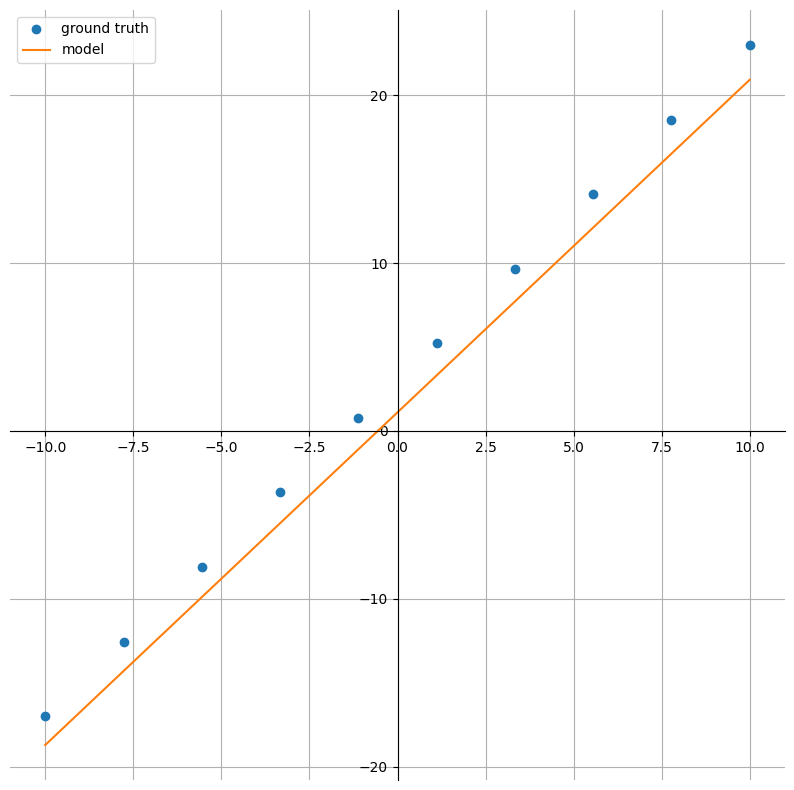

Epoch: {t}; Train Loss:{train_loss}


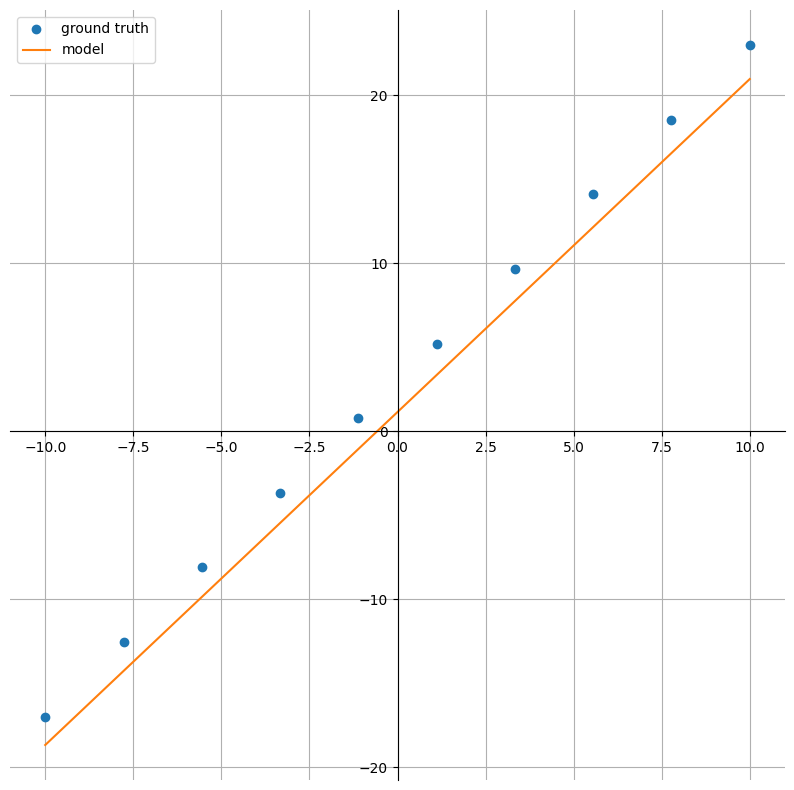

Epoch: {t}; Train Loss:{train_loss}


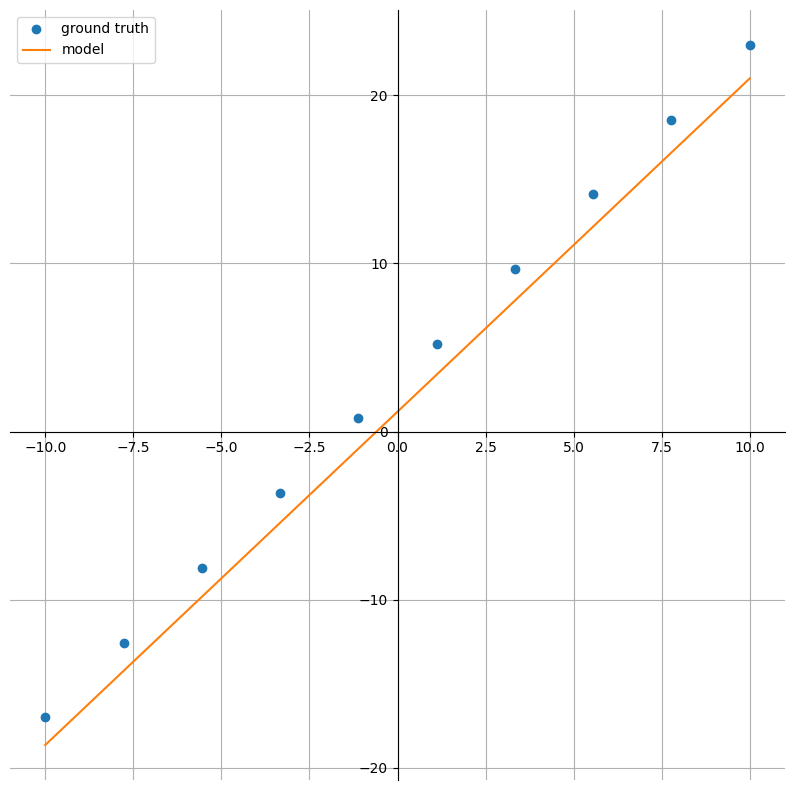

Epoch: {t}; Train Loss:{train_loss}


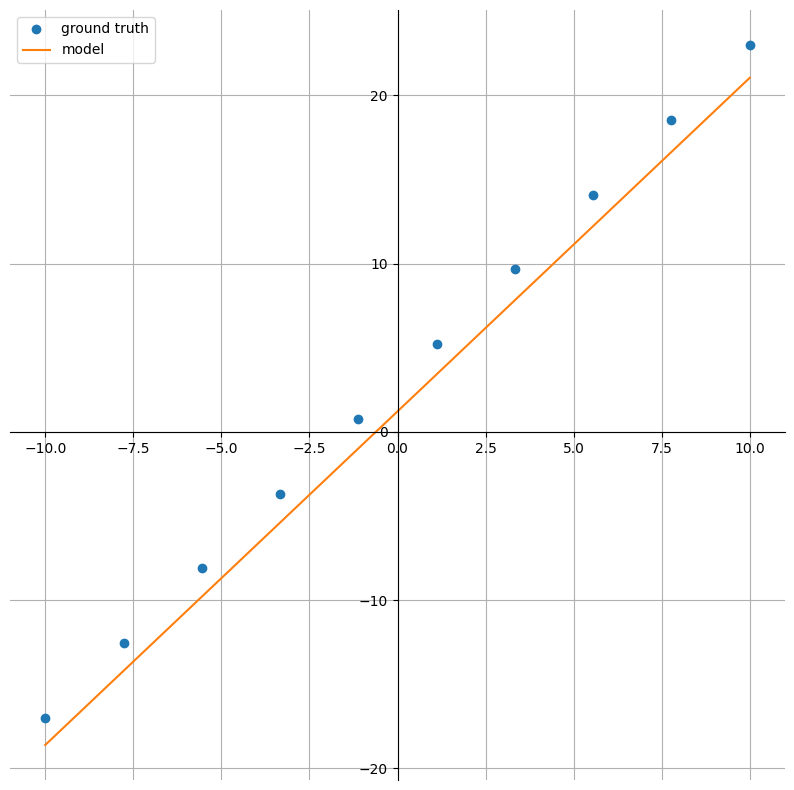

Epoch: {t}; Train Loss:{train_loss}


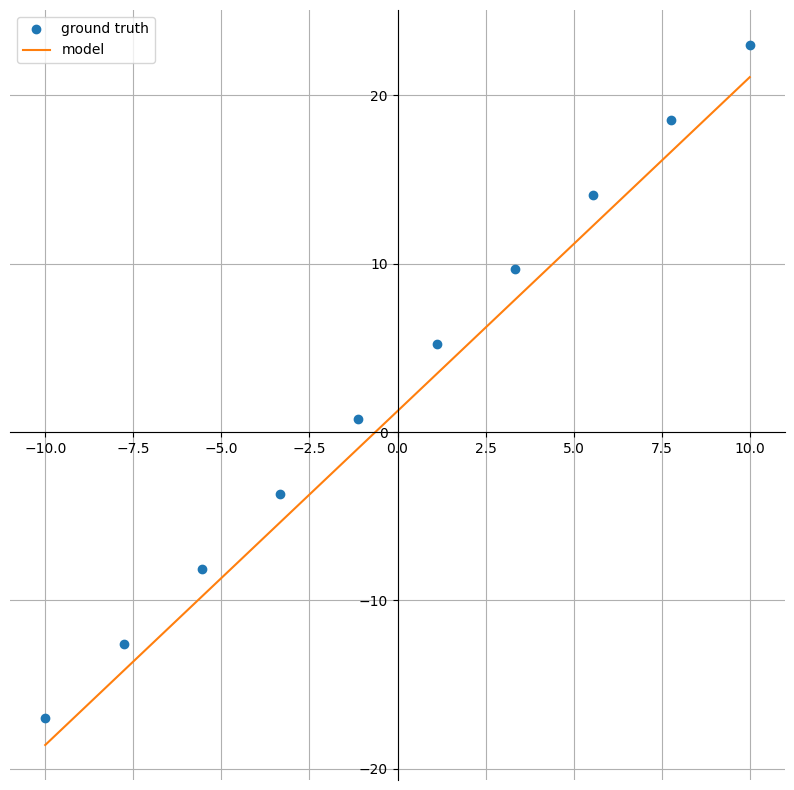

Epoch: {t}; Train Loss:{train_loss}


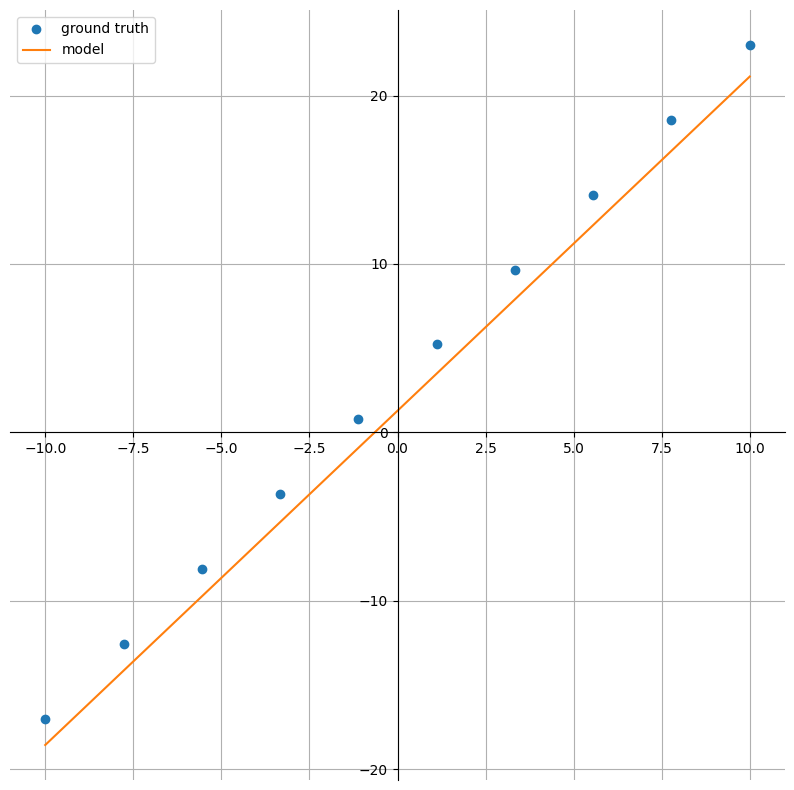

Epoch: {t}; Train Loss:{train_loss}


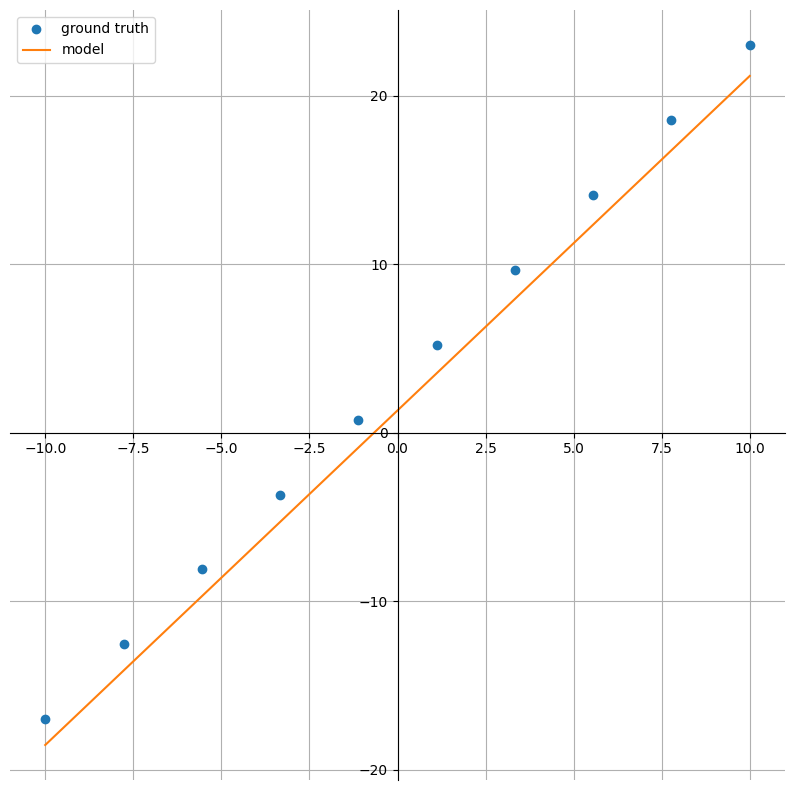

Epoch: {t}; Train Loss:{train_loss}


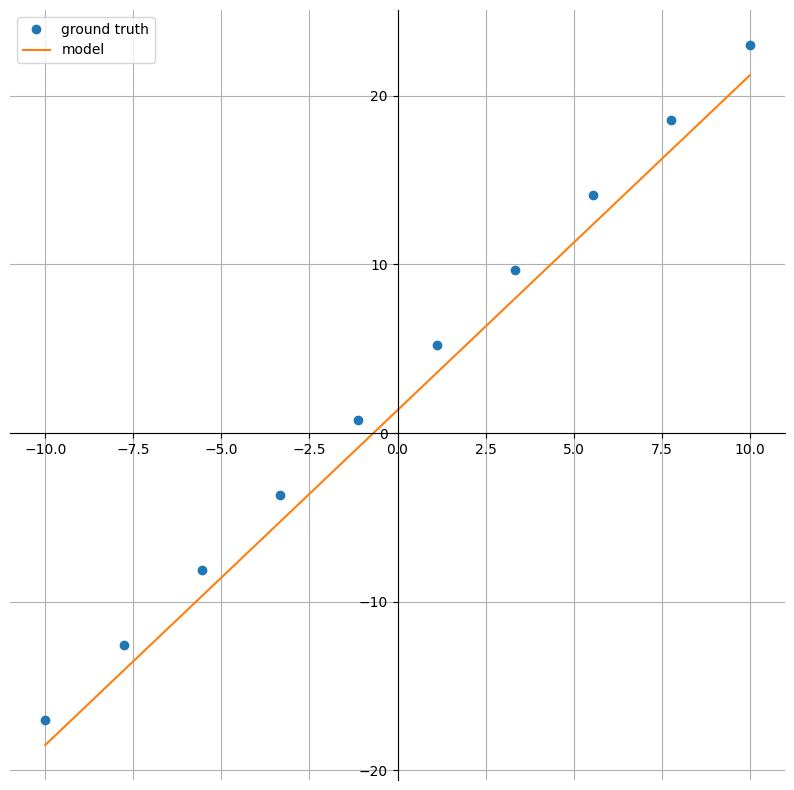

Epoch: {t}; Train Loss:{train_loss}


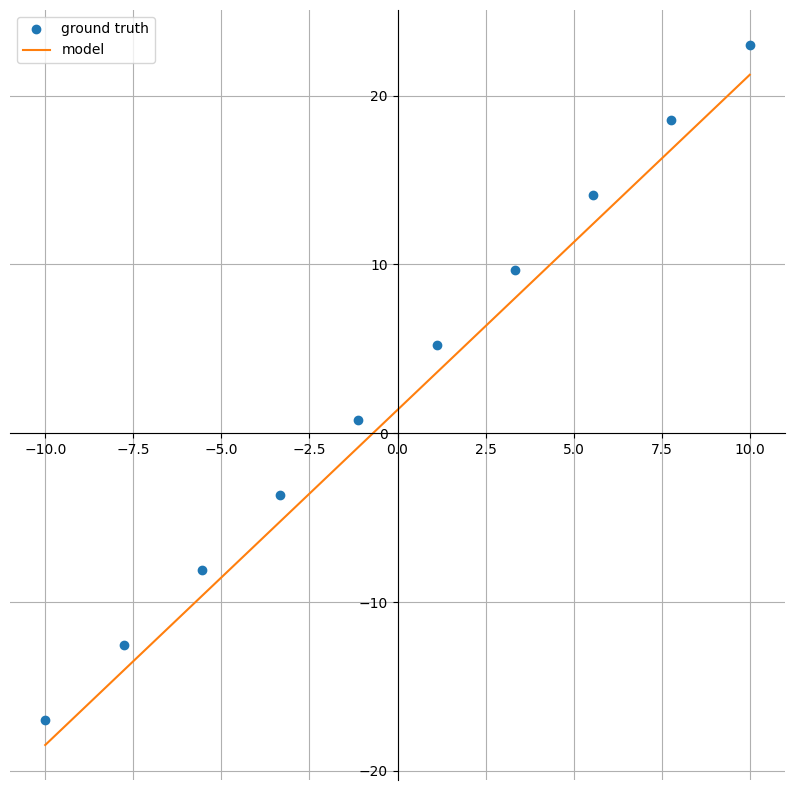

Epoch: {t}; Train Loss:{train_loss}


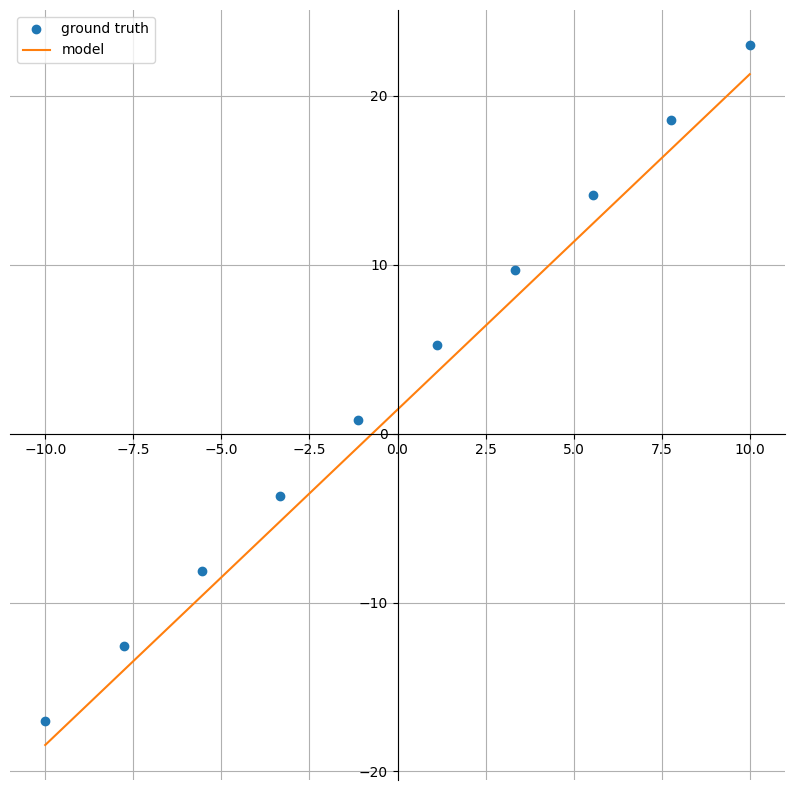

Epoch: {t}; Train Loss:{train_loss}


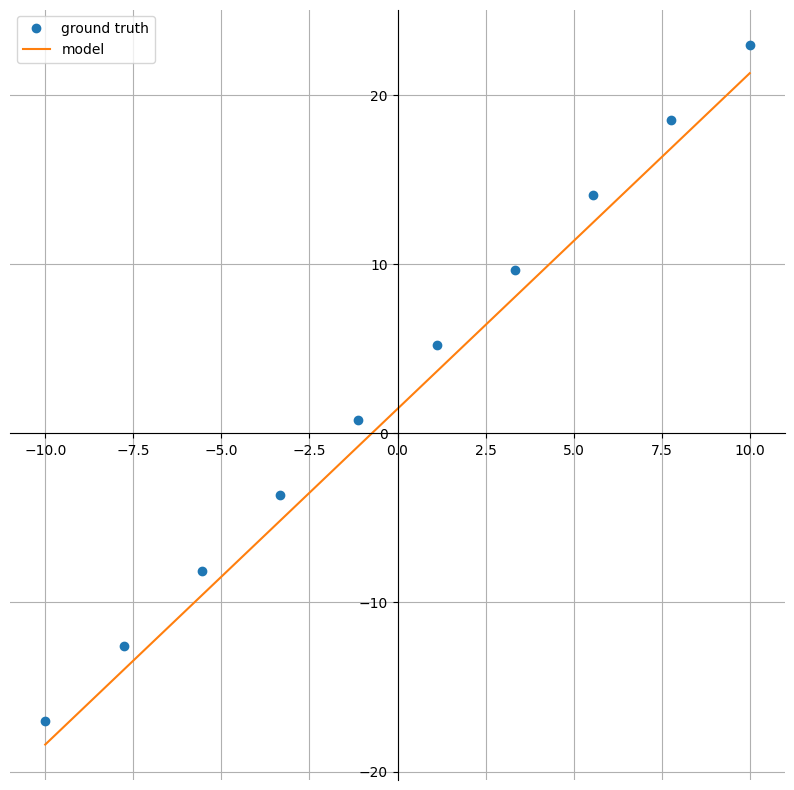

Epoch: {t}; Train Loss:{train_loss}


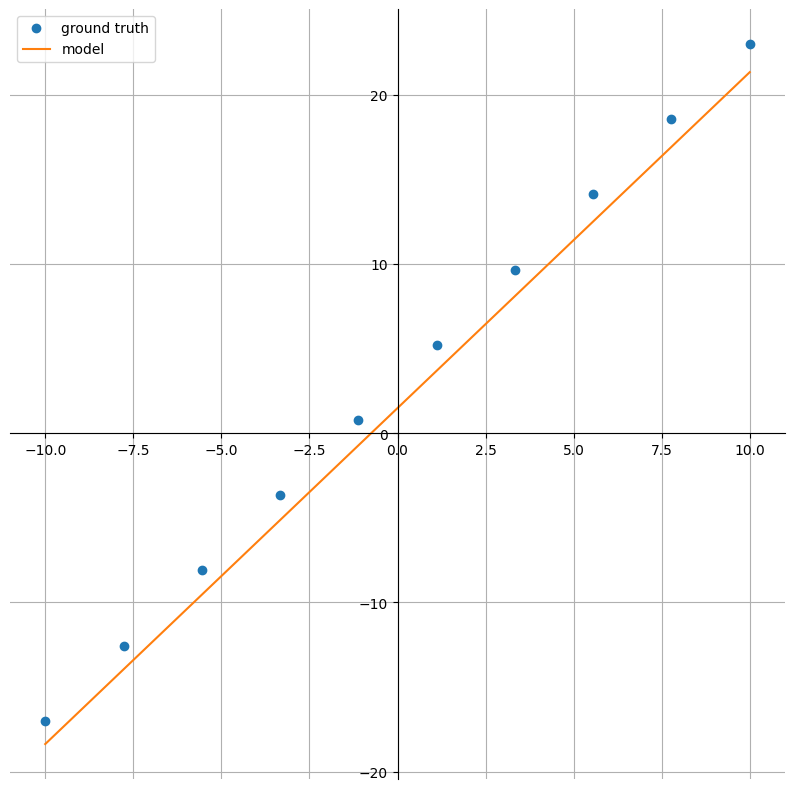

Epoch: {t}; Train Loss:{train_loss}


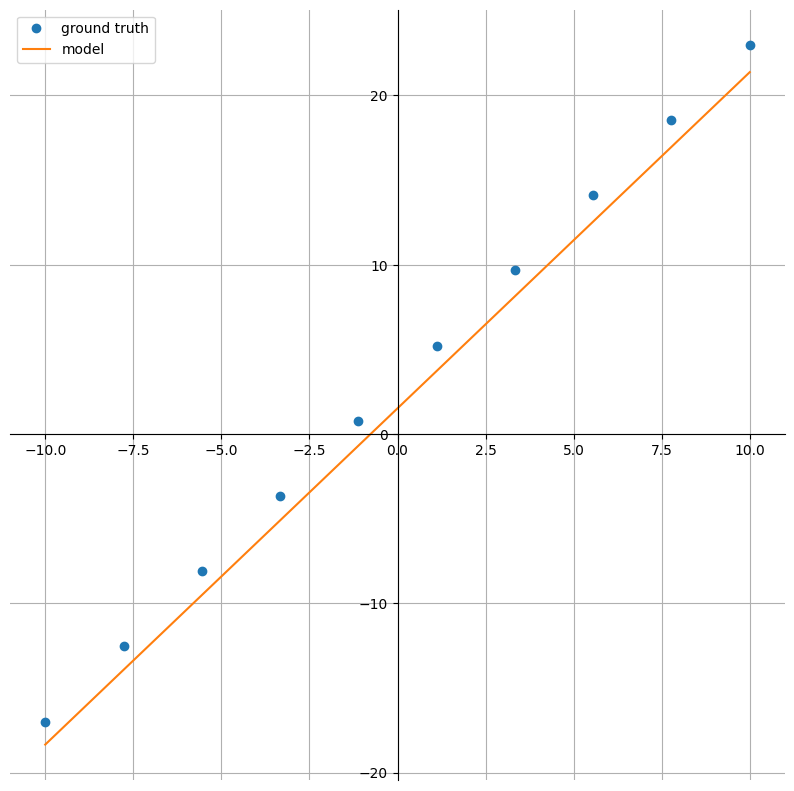

Epoch: {t}; Train Loss:{train_loss}


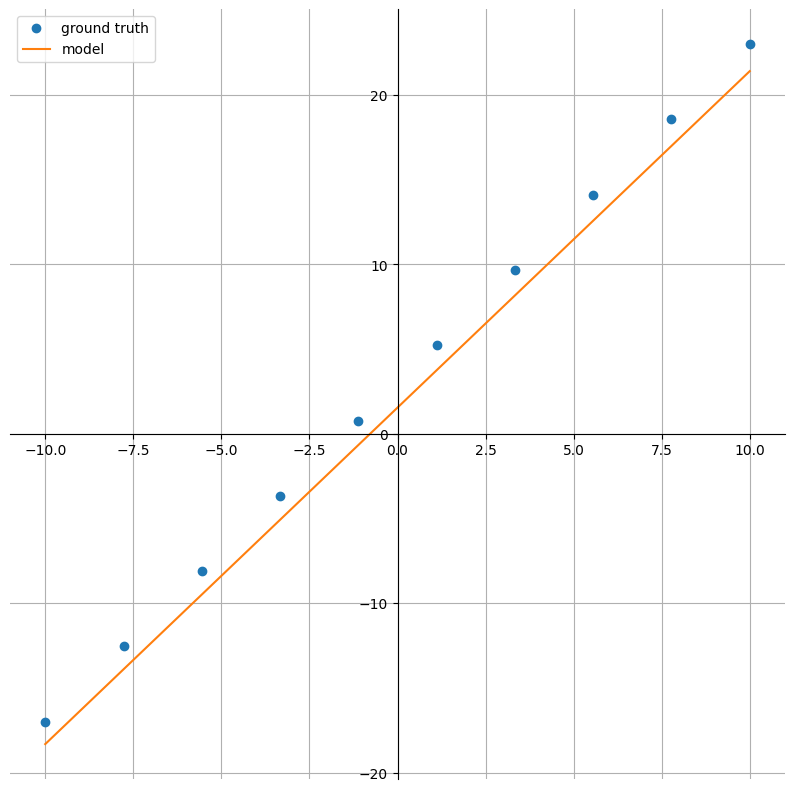

Epoch: {t}; Train Loss:{train_loss}


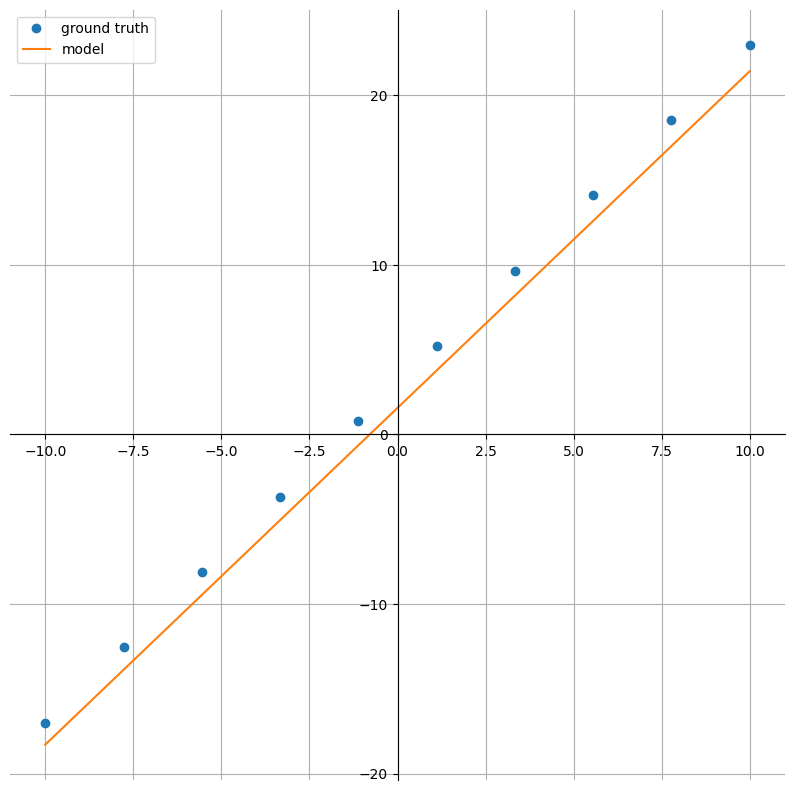

Epoch: {t}; Train Loss:{train_loss}


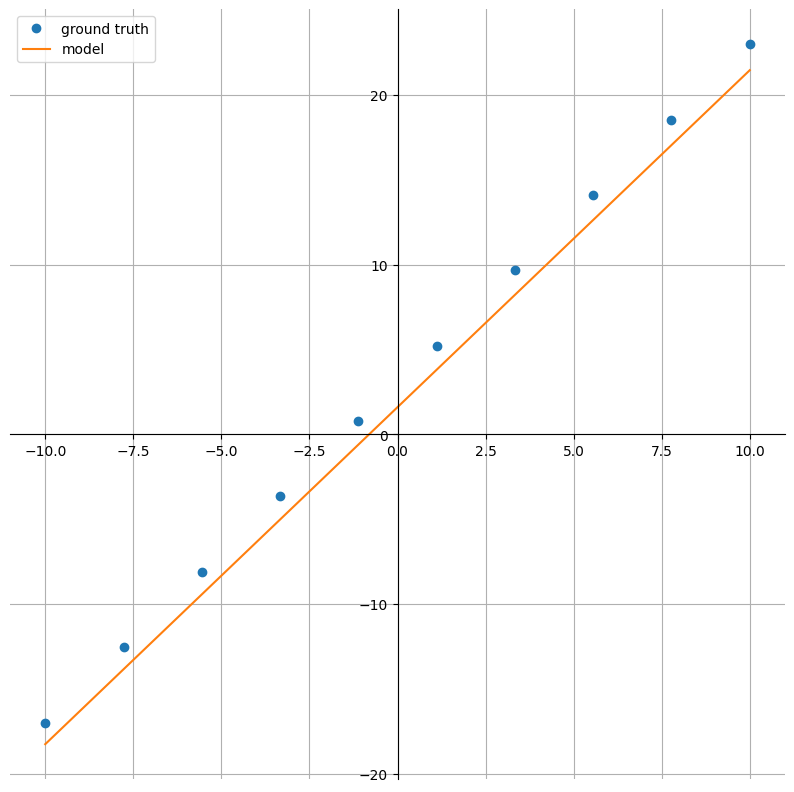

Test Loss:1.985519289970398


In [15]:
epochs = 201
for t in range(epochs):
    train_loss = train(model, train_dataloader, lossfunc, optimizer)
    if t % 10 == 0:
       print("Epoch: {t}; Train Loss:{train_loss}") 
       plot_comparinson(line, model)

test_loss = test(model, test_dataloader, lossfunc)
print(f"Test Loss:{test_loss}")